# Starbucks Project

## Data Exploration

---

Updated on December 05, 2020

In [1]:
import numpy as np
import pandas as pd
import random
import math
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
portfolio_df = pd.read_json('portfolio.json', orient = 'records', lines = True)
profile_df = pd.read_json('profile.json', orient = 'records', lines = True)
transcript_df = pd.read_json('transcript.json', orient = 'records', lines = True)

Below we walk through some exploratory analysis of the data.

## I. Portfolio_df

`portfolio_df` contains the **information of the offers**, whcih has the following columns:

- `reward` (int) reward given. Range from 0 to 10
- `difficulty` (int) minimum spend required to complete the offer
- `duration` (int) duration of the offer (unit: days)
- `offer_type` (str) the type of the offer (`bogo`, `informational`, `discount`)
- `id` (str) the offer id


In [4]:
print("Shape of portfolio_df = {}".format(portfolio_df.shape))
portfolio_df.head(5)

Shape of portfolio_df = (10, 6)


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [7]:
portfolio_df.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


<Figure size 432x288 with 0 Axes>

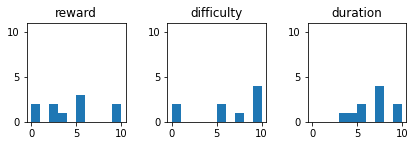

In [8]:
plt.figure()
fig, _ = plt.subplots(1,3)
fig.tight_layout()
plt.subplot(1,3,1)
plt.hist(portfolio_df['reward'], bins = range(11))
plt.title("reward")
plt.axis('square')
plt.subplot(1,3,2)
plt.hist(portfolio_df['difficulty'], bins = range(11))
plt.title("difficulty")
plt.axis('square')
plt.subplot(1,3,3)
plt.hist(portfolio_df['duration'], bins = range(11))
plt.title("duration")
plt.axis('square')

plt.show()

## Profile_df

`profile_df` contains the following columns:

- `gender` (str) the gender (`None`, `F`, `M`, `O`)
- `age` (int) age of the customer
- `id` (str) the customer id (all distinct)
- `became_member_on` (int) the date when custer created an app account
- `income` (float) customer's income

In [11]:
print("Shape of profile_df = {}".format(profile_df.shape))
profile_df.head(3)

Shape of profile_df = (17000, 5)


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN


### Gender analysis

gender
F      6129
M      8484
O       212
NaN    2175
dtype: int64


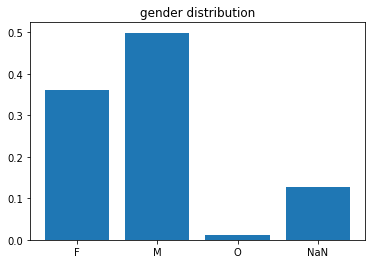

In [28]:
print(profile_df.groupby(['gender'], dropna = False).size())

plt.figure()
plt.bar(np.arange(4), profile_df.groupby(['gender'], dropna = False).size()/17000)
plt.xticks(np.arange(4), ("F", "M", "O", "NaN"))
plt.title("gender distribution")
plt.show()

### Age analysis

We se that the age distribution has the maximum around 50-60. And also a fat tail in the range 20-40.

We observe no missing age data.

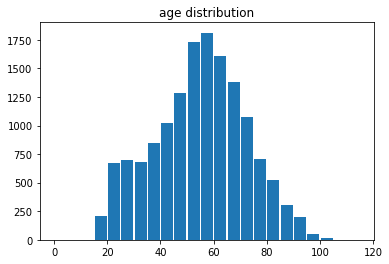

Number of NaN = 0 (0.00%)


In [36]:
plt.figure()
plt.hist(profile_df['age'].values, bins = np.arange(0, 120, 5), rwidth = 0.9)
plt.title("age distribution")
plt.show()


print("Number of NaN = {} ({:.2f}%)".format(profile_df['age'].isna().sum(), profile_df['age'].isna().sum()/17000))

### Income analysis

We see that the income data lies between 30,000 to 120,000.

It looks that we can split the distribution into 4 groups.

There are 2,175 missing income data.

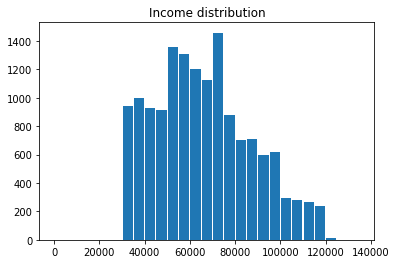

Number of NaN = 2175 (0.13%)


In [41]:
plt.figure()
plt.hist(profile_df['income'].values, bins = np.arange(0, 140000, 5000), rwidth = 0.9)
plt.title("Income distribution")
plt.show()


print("Number of NaN = {} ({:.2f}%)".format(profile_df['income'].isna().sum(), profile_df['income'].isna().sum()/17000))

### App account sign-up date analysis

We convert the `became_member_on` column into `YYYY-MM-DD` format by the function `pd.to_datetime`

In [43]:
## sudate (sign-up date)

sudate = pd.to_datetime(profile_df['became_member_on'], format = '%Y%m%d')

sudate.head(5)

0   2017-02-12
1   2017-07-15
2   2018-07-12
3   2017-05-09
4   2017-08-04
Name: became_member_on, dtype: datetime64[ns]

## Transcript_df

`transcript_df` contains the following columns:

- `person` (str) the customer id
- `event` (str) type of the record (`offer received`, `offer viewed`, `transaction`, `offer completed`)
- `value` (dict[str]) the detail of the event (see below) 
- `time` (int) time from the start of test (unit: hour)

The keys of `transcript['value']` column depends on the type of the event:

- if `event` = 'offer received', keys = 'offer id'
- if `event` = 'offer viewed', keys = 'offer id'
- if `event` = 'transaction', keys = 'amount'
- if `event` = 'offer completed', keys = 'offer id'

In [44]:
transcript_df.head(3)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
